## Clustering 

- 聚類是一個過程，通過該過程您可以根據它們之間的距離將大量數據點收集到較少數量的組中。在數據量很大並且您想提取一些感興趣的數字的情況下，它很有用。它是一種無監督學習。聚類的一個常見用途是識別群體的不同子集，例如在人口普查中。

- 有許多算法可用於執行聚類，最簡單和最常見的是 k 均值聚類。讓我們首先使用 scikit-learn 為我們提供一些隨機生成的數據點。 它提供了一個名為 make_blobs() 的函數，它創建了許多Gaussian clusters。

- 我們將要求它在 4 個集群中創建 500 個點。 我們設置 random_state=6 以確保此示例將始終生成相同的可重現點。

In [1]:
from sklearn.datasets import make_blobs

data, true_labels = make_blobs(n_samples=500, centers=4, random_state=6)

- 我們將數據放入一個 Pandas DataFrame 中，為我們提供一個更好的 API 來使用它。 我們繪製它以查看它的外觀，根據生成的集群為每個點著色。

<AxesSubplot:xlabel='x1', ylabel='x2'>

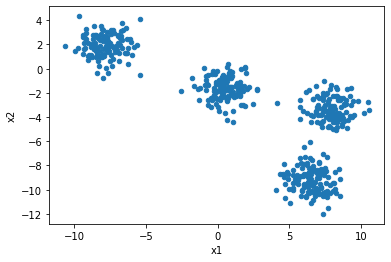

In [7]:
%matplotlib inline
import pandas as pd
points = pd.DataFrame(data, columns=["x1", "x2"])
points.plot.scatter("x1", "x2")

- 現在我們已經計算了聚類中心，我們可以使用模型的 cluster_centers_ 數據屬性來查看它決定了哪些聚類。

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(points)

In [4]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=["x1", "x2"])
cluster_centers

,x1,x2
0,0.485425,-1.628580
1,6.485156,-9.212537
2,-7.857994,1.892259
3,7.886559,-3.337117


- 根據圖的值已將中心放置在正確的位置。 最好能直接看到它，所以讓我們在原始數據的頂部繪製中心。

<AxesSubplot:xlabel='x1', ylabel='x2'>

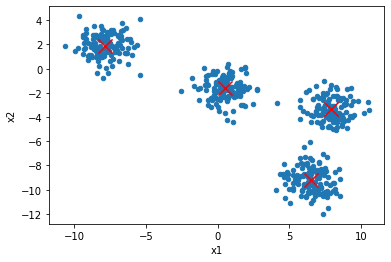

In [5]:
ax = points.plot.scatter("x1", "x2")
cluster_centers.plot.scatter("x1", "x2", ax=ax, c="red", s=200, marker="x")

- 我們可以從模型中檢索的另一條數據是它分配給每個數據點的集群。 這可作為labels_data 屬性使用，它是一個包含500 個條目的數組，每個條目都是0 到3 之間的數字。我們可以使用它為我們的繪圖著色以查看集群的出現。

<AxesSubplot:xlabel='x1', ylabel='x2'>

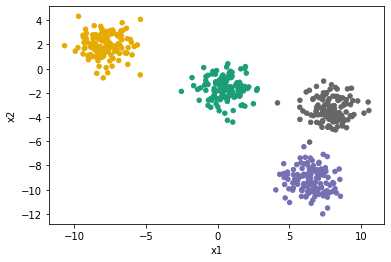

In [6]:
points.plot.scatter("x1", "x2", c=kmeans.labels_, colormap="Dark2", colorbar=False)

## Project

In [8]:
from pandas import DataFrame
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X = DataFrame(load_iris().data, columns=load_iris().feature_names)
X = X[["sepal length (cm)", "sepal width (cm)"]]  # Grab just two of the features
y = load_iris().target

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

parameters = {
    "n_neighbors" : range(1, 60),
}
clf = GridSearchCV(model, parameters).fit(train_X, train_y)

In [10]:
cv_results = DataFrame(clf.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
30,31,0.795652,0.056227,1
28,29,0.795257,0.042471,2
39,40,0.795257,0.089407,2
41,42,0.795257,0.070491,2
42,43,0.795257,0.070491,2


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

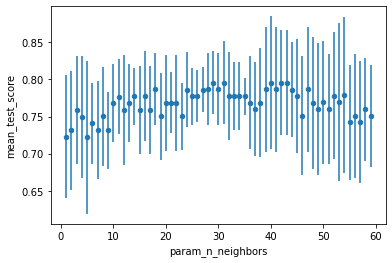

In [11]:
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

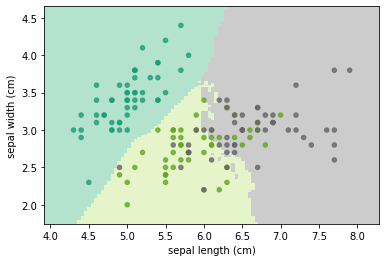

In [12]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)

plot_knn(clf, X, y)

In [13]:
clf.score(test_X, test_y)

0.868421052631579

## Project 2

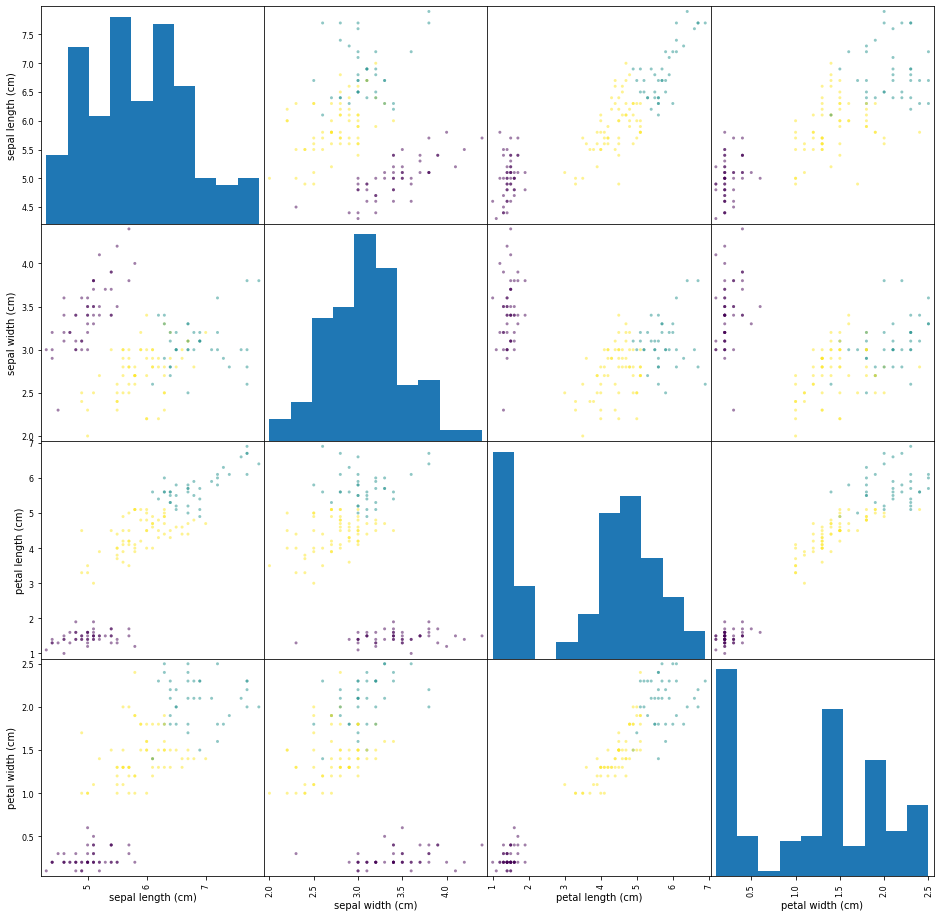

In [14]:
%matplotlib inline

from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = DataFrame(load_iris().data, columns=load_iris().feature_names)

num_iris_species = len(load_iris().target_names)

kmeans = KMeans(n_clusters=num_iris_species).fit(iris)

a = scatter_matrix(iris, figsize=(16, 16), c=kmeans.labels_)

## Project 3

<AxesSubplot:>

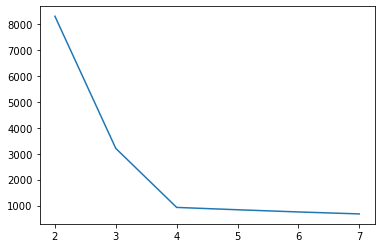

In [15]:
%matplotlib inline

from pandas import Series, DataFrame
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

data, true_labels = make_blobs(n_samples=500, centers=4, random_state=6)
points = DataFrame(data, columns=["x", "y"])

inertia_values = []
r = pd.RangeIndex(2, 8)
for n_clusters in r:
    kmeans = KMeans(n_clusters=n_clusters).fit(points)
    inertia_values.append(kmeans.inertia_)

inertia = Series(inertia_values, name="inertia", index=r)
inertia.plot()